In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:

df=pd.read_excel("glass.xlsx",sheet_name=1)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:

print("Missing values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())


Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Data Types:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

Summary Statistics:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.5

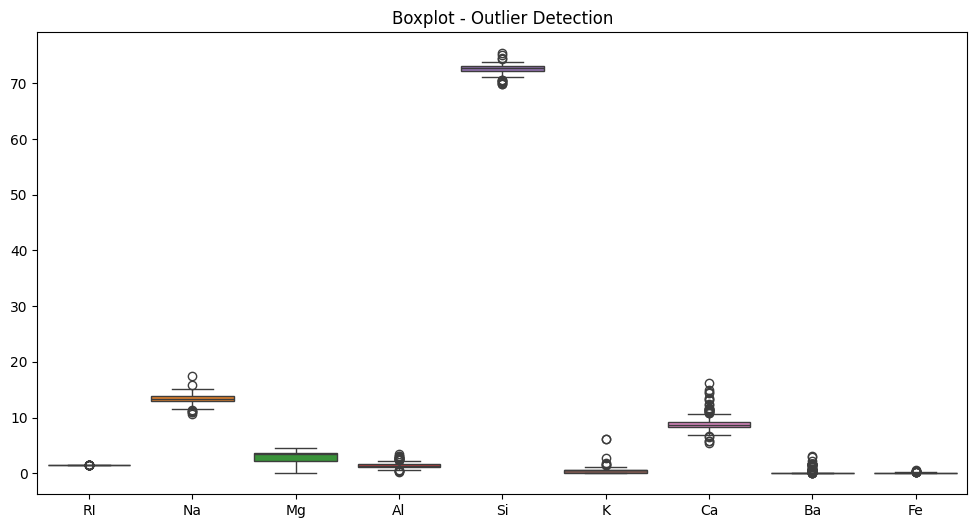

In [ ]:
# outliers detection 
plt.figure(figsize=(12,6))
sns.boxplot(data=df.drop(columns=["Type"]))
plt.title("Boxplot - Outlier Detection")
plt.show()

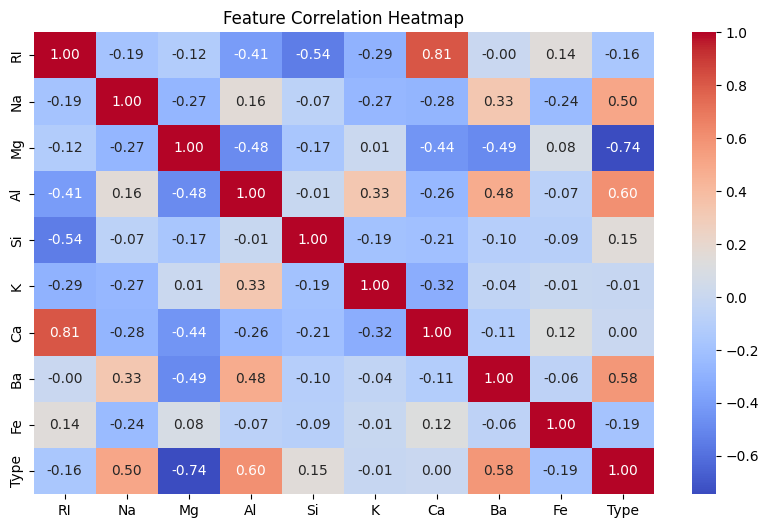

In [ ]:

# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


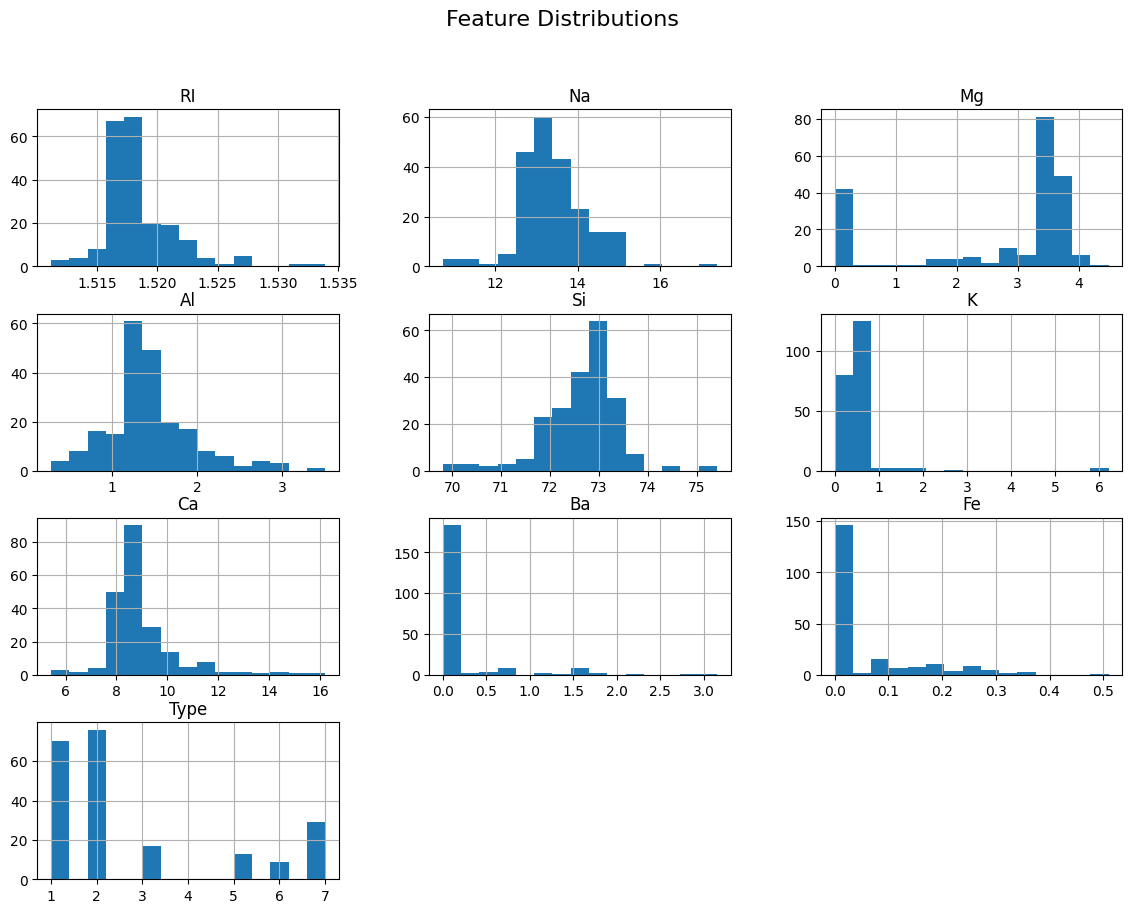

In [ ]:



# Histogram 
df.hist(figsize=(14,10), bins=15)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [7]:
X = df.drop("Type", axis=1)
y = df["Type"]

In [8]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [ ]:
# model training 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [11]:

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Random Forest Results:
Accuracy: 0.7692307692307693
              precision    recall  f1-score   support

           1       0.74      0.89      0.81        19
           2       0.75      0.65      0.70        23
           3       0.67      0.50      0.57         4
           5       0.75      0.50      0.60         6
           6       0.75      1.00      0.86         3
           7       0.91      1.00      0.95        10

    accuracy                           0.77        65
   macro avg       0.76      0.76      0.75        65
weighted avg       0.77      0.77      0.76        65



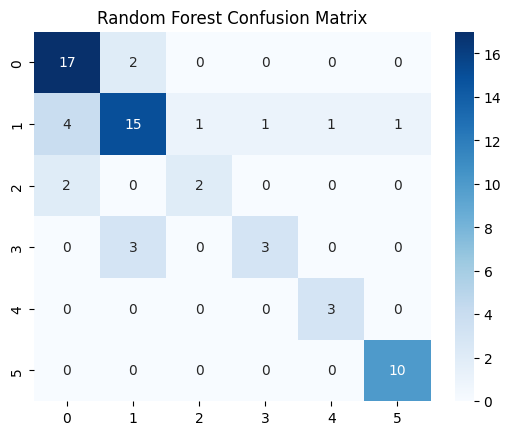

In [ ]:

# CM
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [13]:
# Bagging
bag = BaggingClassifier(estimator=RandomForestClassifier(), n_estimators=10, random_state=42)
bag.fit(X_train, y_train)
y_bag = bag.predict(X_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_bag))

Bagging Accuracy: 0.7692307692307693


In [14]:
# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_ada))


AdaBoost Accuracy: 0.5384615384615384


In [15]:





# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_gb))


Gradient Boosting Accuracy: 0.8


### 1. Explain Bagging and Boosting methods. How is it different from each other?

**Bagging (Bootstrap Aggregating):**  
- Train multiple models independently on different random samples (bootstraps) of the dataset.  
- Final prediction is done by **averaging** (for regression) or **majority voting** (for classification).  
- Reduces **variance** (helps avoid overfitting).  
- Example algorithms: Random Forest, Bagged Trees.  

**Boosting:**  
- Models are trained **sequentially**, where each new model tries to correct the errors of the previous one.  
- Final prediction is a **weighted combination** of all weak learners.  
- Reduces **bias** and can achieve very high accuracy.  
- Example algorithms: AdaBoost, Gradient Boosting, XGBoost, LightGBM.  

**Key Differences:**  
| Aspect | Bagging | Boosting |
|--------|---------|----------|
| Training | Parallel (independent models) | Sequential (dependent models) |
| Focus | Reduces variance | Reduces bias |
| Weighting | Equal weight for models | Higher weight for better learners |
| Example | Random Forest | XGBoost, AdaBoost |

---

### 2. Explain how to handle imbalance in the data.

Imbalanced data means one class has many more samples than the other (e.g., fraud detection, disease detection).  

**Techniques to handle imbalance:**  
1. **Resampling Methods**  
   - **Oversampling minority class** (e.g., SMOTE).  
   - **Undersampling majority class**.  

2. **Class Weights Adjustment**  
   - Assign higher weights to minority class during training (many ML libraries support `class_weight` parameter).  

3. **Synthetic Data Generation**  
   - Use algorithms like **SMOTE** or **ADASYN** to generate new samples for the minority class.  

4. **Anomaly Detection Methods**  
   - Treat minority class as anomalies and use anomaly detection algorithms.  

5. **Evaluation Metrics**  
   - Instead of Accuracy, use **Precision, Recall, F1-score, ROC-AUC, PR-AUC** to evaluate performance.  

**Summary:**  
- Balance the data either by resampling or weighting.  
- Always evaluate using metrics suitable for imbalanced datasets.  
